<a href="https://colab.research.google.com/github/Matvezy/Body-Mesurments/blob/master/TrainExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
%cd /content/gdrive/MyDrive/AITrainingLibDotsPos500

In [ ]:
X = df.iloc[:,0]
y = df.iloc[:, df.columns != 'Mask']

NameError: ignored

In [ ]:
X

0      [[[tensor(False), tensor(False), tensor(False)...
1      [[[tensor(False), tensor(False), tensor(False)...
2      [[[tensor(False), tensor(False), tensor(False)...
3      [[[tensor(False), tensor(False), tensor(False)...
4      [[[tensor(False), tensor(False), tensor(False)...
                             ...                        
495    [[[tensor(False), tensor(False), tensor(False)...
496    [[[tensor(False), tensor(False), tensor(False)...
497    [[[tensor(False), tensor(False), tensor(False)...
498    [[[tensor(False), tensor(False), tensor(False)...
499    [[[tensor(False), tensor(False), tensor(False)...
Name: Mask, Length: 500, dtype: object

In [ ]:
for i in range(2, 500):
  X[i] = TF.to_tensor(X[i])
for i in range(500):
  y[str(i)] = TF.to_tensor(y[i])

NameError: ignored

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
X[0] = TF.to_tensor(X[1])
X[0]

TypeError: ignored

In [ ]:
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

In [ ]:
df['Mask'][0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
scaler = MinMaxScaler()
"""
y_train = scaler.fit_transform(X_train)
y_val = scaler.transform(X_val)
y_test = scaler.transform(X_test)
"""
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

TypeError: ignored

In [ ]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
return (x)
def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
return (x)

In [ ]:
# import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import random

# get the pretrained model from torchvision.models
# Note: pretrained=True will get the pretrained weights for the model.
# model.eval() to use the model for inference
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()


def random_colour_masks(image):
  """
  random_colour_masks
    parameters:
      - image - predicted masks
    method:
      - the masks of each predicted object is given random colour for visualization
  """
  colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
  coloured_mask = np.stack([r, g, b], axis=2)
  return coloured_mask

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person'
]

def get_prediction(img_path, threshold):
  """
  get_prediction
    parameters:
      - img_path - path of the input image
    method:
      - Image is obtained from the image path
      - the image is converted to image tensor using PyTorch's Transforms
      - image is passed through the model to get the predictions
      - masks, classes and bounding boxes are obtained from the model and soft masks are made binary(0 or 1) on masks
        ie: eg. segment of cat is made 1 and rest of the image is made 0
    
  """
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  masks = masks[:pred_t+1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return masks, pred_boxes, pred_class


def instance_segmentation_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  """
  instance_segmentation_api
    parameters:
      - img_path - path to input image
    method:
      - prediction is obtained by get_prediction
      - each mask is given random color
      - each mask is added to the image in the ration 1:0.8 with opencv
      - final output is displayed
  """
  masks, boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(masks)):
    rgb_mask = random_colour_masks(masks[i])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]

a,b,c=colours[0]

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


In [ ]:
dataset =  {"Mask":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[],"7":[], "8":[],"9":[], "10":[],"11":[], "12":[],"13":[], "14":[],"15":[], "16":[],"17":[], "18":[],"19":[], "20":[],"21":[], "22":[],"23":[], "24":[],"25":[]}

In [ ]:
%cd /content/gdrive/MyDrive/AITrainingLibDotsPos500

/content/gdrive/MyDrive/AITrainingLibDotsPos500


In [ ]:
for i in range(1,501):
  cords = open("AITrainingLib/"+str(i)+"/FrontDots.txt", "r").read()
  cords = cords.strip().split("\n")[0:-2]
  for cord in cords:
    cord = cord.split(" ")
    name = cord[0][0:-1]
    x = cord[1][cord[1].index("=")+1:]
    y = cord[2][cord[2].index("=")+1:]
    dataset[name].append((int(x),int(y)))

In [ ]:
for i in range(1,501):
  img = Image.open("AITrainingLib/"+str(i)+"/Front.png")
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  if img.size()[0] == 4:
    img = img[:3, ...]   
  pred = model([img])
  masks = (pred[0]['masks']>0.8).squeeze().detach().cpu().numpy()
  labels = pred[0]['labels'].detach().numpy()
  scores = pred[0]['scores'].detach().numpy()
  indh = np.where(labels == 1)
  needed = np.where(scores[indh] > 0.8)
  mask = masks[needed][0]
  dataset["Mask"].append(mask)

In [ ]:
dataset["25"].insert(499, (535,619))

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset, columns= list(dataset.keys()))

In [ ]:
df.head()

,Mask,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,"[[False, False, False, False, False, False, Fa...","(540, 234)","(550, 245)","(566, 252)","(583, 258)","(577, 293)","(562, 328)","(563, 357)","(562, 391)","(566, 434)","(571, 469)","(584, 516)","(523, 522)","(510, 501)","(503, 231)","(493, 242)","(476, 247)","(458, 251)","(461, 286)","(467, 322)","(465, 352)","(463, 387)","(455, 433)","(450, 469)","(439, 516)","(499, 520)"
1,"[[False, False, False, False, False, False, Fa...","(566, 274)","(578, 286)","(600, 292)","(620, 297)","(614, 336)","(601, 376)","(605, 405)","(615, 438)","(642, 490)","(652, 526)","(663, 582)","(562, 588)","(554, 565)","(526, 275)","(516, 287)","(494, 294)","(474, 300)","(481, 341)","(492, 378)","(491, 410)","(484, 446)","(466, 493)","(456, 528)","(446, 584)","(546, 588)"
2,"[[False, False, False, False, False, False, Fa...","(491, 271)","(503, 283)","(521, 287)","(540, 291)","(536, 328)","(533, 355)","(529, 394)","(518, 433)","(539, 482)","(548, 524)","(560, 573)","(486, 579)","(474, 556)","(444, 276)","(436, 288)","(418, 295)","(399, 302)","(406, 336)","(400, 365)","(416, 401)","(430, 436)","(414, 482)","(404, 522)","(391, 571)","(462, 599)"
3,"[[False, False, False, False, False, False, Fa...","(488, 331)","(499, 341)","(518, 345)","(537, 350)","(527, 383)","(513, 411)","(515, 438)","(515, 468)","(536, 510)","(547, 548)","(558, 591)","(483, 599)","(471, 581)","(452, 330)","(444, 341)","(425, 345)","(407, 350)","(412, 383)","(421, 411)","(422, 438)","(424, 471)","(406, 511)","(396, 549)","(385, 592)","(538, 572)"
4,"[[False, False, False, False, False, False, Fa...","(560, 282)","(570, 295)","(588, 300)","(606, 305)","(601, 338)","(591, 373)","(597, 403)","(606, 437)","(612, 486)","(614, 522)","(623, 569)","(559, 572)","(550, 554)","(525, 283)","(516, 296)","(497, 302)","(479, 308)","(488, 340)","(499, 375)","(494, 407)","(487, 444)","(488, 488)","(485, 522)","(475, 569)","(519, 569)"


In [ ]:
import time
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imutils
import matplotlib.image as mpimg
from collections import OrderedDict
from skimage import io, transform
from math import *
import xml.etree.ElementTree as ET 

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
class Transforms():
    def __init__(self):
        pass
    
    def rotate(self, image, landmarks, angle):
        angle = random.uniform(-angle, +angle)

        transformation_matrix = torch.tensor([
            [+cos(radians(angle)), -sin(radians(angle))], 
            [+sin(radians(angle)), +cos(radians(angle))]
        ])

        image = imutils.rotate(np.array(image), angle)

        landmarks = landmarks - 0.5
        new_landmarks = np.matmul(landmarks, transformation_matrix)
        new_landmarks = new_landmarks + 0.5
        return Image.fromarray(image), new_landmarks

    def resize(self, image, landmarks, img_size):
        image = TF.resize(image, img_size)
        return image, landmarks

    def color_jitter(self, image, landmarks):
        color_jitter = transforms.ColorJitter(brightness=0.3, 
                                              contrast=0.3,
                                              saturation=0.3, 
                                              hue=0.1)
        image = color_jitter(image)
        return image, landmarks

    def crop_face(self, image, landmarks, crops):
        left = int(crops['left'])
        top = int(crops['top'])
        width = int(crops['width'])
        height = int(crops['height'])

        image = TF.crop(image, top, left, height, width)

        img_shape = np.array(image).shape
        landmarks = torch.tensor(landmarks) - torch.tensor([[left, top]])
        landmarks = landmarks / torch.tensor([img_shape[1], img_shape[0]])
        return image, landmarks

    def __call__(self, image, landmarks, crops):
        image = Image.fromarray(image)
        image, landmarks = self.crop_face(image, landmarks, crops)
        image, landmarks = self.resize(image, landmarks, (224, 224))
        image, landmarks = self.color_jitter(image, landmarks)
        image, landmarks = self.rotate(image, landmarks, angle=10)
        
        image = TF.to_tensor(image)
        image = TF.normalize(image, [0.5], [0.5])
        return image, landmarks

In [ ]:
class FaceLandmarksDataset(Dataset):

    def __init__(self, transform=None):

        tree = ET.parse('trainFront.xml')
        root = tree.getroot()
        self.image_filenames = []
        self.landmarks = []
        self.crops = []
        self.transform = transform
        for filename in root[1]:
            self.image_filenames.append(filename.attrib['file'])
            self.crops.append(filename[0].attrib)

            landmark = []
            for num in range(24):
                if num == 11:
                  continue
                x_coordinate = int(filename[0][num].attrib['x'])
                y_coordinate = int(filename[0][num].attrib['y'])
                landmark.append([x_coordinate, y_coordinate])
            self.landmarks.append(landmark)

        self.landmarks = np.array(self.landmarks).astype('float32')     

        assert len(self.image_filenames) == len(self.landmarks)

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, index):
        image = cv2.imread(self.image_filenames[index], 0)
        landmarks = self.landmarks[index]
        
        if self.transform:
            image, landmarks = self.transform(image, landmarks, self.crops[index])

        landmarks = landmarks - 0.5

        return image, landmarks

dataset = FaceLandmarksDataset(Transforms())

['AITrainingLib/2/Front.png', 'AITrainingLib/3/Front.png', 'AITrainingLib/4/Front.png', 'AITrainingLib/5/Front.png', 'AITrainingLib/6/Front.png', 'AITrainingLib/7/Front.png', 'AITrainingLib/8/Front.png', 'AITrainingLib/9/Front.png', 'AITrainingLib/10/Front.png', 'AITrainingLib/11/Front.png', 'AITrainingLib/12/Front.png', 'AITrainingLib/13/Front.png', 'AITrainingLib/14/Front.png', 'AITrainingLib/15/Front.png', 'AITrainingLib/16/Front.png', 'AITrainingLib/17/Front.png', 'AITrainingLib/18/Front.png', 'AITrainingLib/19/Front.png', 'AITrainingLib/20/Front.png', 'AITrainingLib/21/Front.png', 'AITrainingLib/22/Front.png', 'AITrainingLib/23/Front.png', 'AITrainingLib/24/Front.png', 'AITrainingLib/25/Front.png', 'AITrainingLib/26/Front.png', 'AITrainingLib/27/Front.png', 'AITrainingLib/28/Front.png', 'AITrainingLib/29/Front.png', 'AITrainingLib/30/Front.png', 'AITrainingLib/31/Front.png', 'AITrainingLib/32/Front.png', 'AITrainingLib/33/Front.png', 'AITrainingLib/34/Front.png', 'AITrainingLib/35

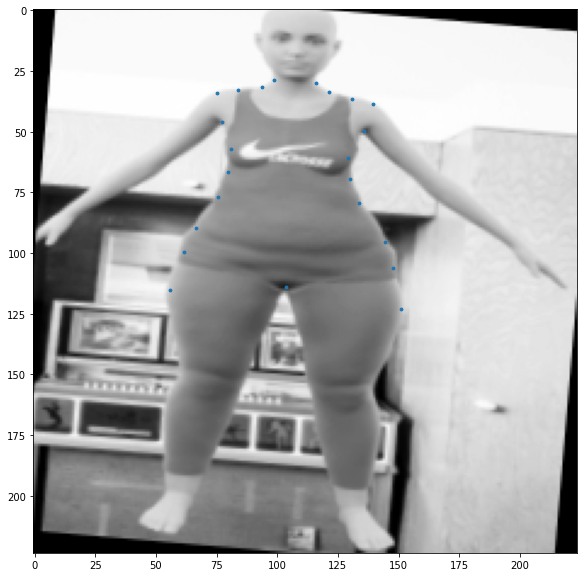

In [ ]:
print(dataset.image_filenames)
image, landmarks = dataset[0]
landmarks = (landmarks + 0.5) * 224
plt.figure(figsize=(10, 10))
plt.imshow(image.numpy().squeeze(), cmap='gray');
plt.scatter(landmarks[:,0], landmarks[:,1], s=8);

In [ ]:
# split the dataset into validation and test sets
len_valid_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_valid_set

print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))

train_dataset , valid_dataset,  = torch.utils.data.random_split(dataset , [len_train_set, len_valid_set])

# shuffle and batch the datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=8, shuffle=True, num_workers=4)

The length of Train set is 405
The length of Valid set is 44


In [ ]:
images, landmarks = next(iter(train_loader))

print(images.shape)
print(landmarks.shape)

torch.Size([64, 1, 224, 224])
torch.Size([64, 23, 2])


In [ ]:
class Network(nn.Module):
    def __init__(self,num_classes=46):
        super().__init__()
        self.model_name='resnet18'
        self.model=models.resnet18()
        self.model.conv1=nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.fc=nn.Linear(self.model.fc.in_features, num_classes)
        
    def forward(self, x):
        x=self.model(x)
        return x

In [ ]:
import sys

def print_overwrite(step, total_step, loss, operation):
    sys.stdout.write('\r')
    if operation == 'train':
        sys.stdout.write("Train Steps: %d/%d  Loss: %.4f " % (step, total_step, loss))   
    else:
        sys.stdout.write("Valid Steps: %d/%d  Loss: %.4f " % (step, total_step, loss))
        
    sys.stdout.flush()

In [ ]:
torch.autograd.set_detect_anomaly(True)
network = Network()
network.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=0.001)

loss_min = np.inf
num_epochs = 400   
start_time = time.time()
for epoch in range(1,num_epochs+1):
    
    loss_train = 0
    loss_valid = 0
    running_loss = 0
    
    network.train()
    #network = network.load_state_dict(torch.load('body_landmarks.pth')) 
    for step in range(1,len(train_loader)+1):
    
        images, landmarks = next(iter(train_loader))
        
        images = images.cuda()
        landmarks = landmarks.view(landmarks.size(0),-1).cuda() 
        
        predictions = network(images)
        
        # clear all the gradients before calculating them
        optimizer.zero_grad()
        
        # find the loss for the current step
        loss_train_step = criterion(predictions, landmarks)
        
        # calculate the gradients
        loss_train_step.backward()
        
        # update the parameters
        optimizer.step()
        
        loss_train += loss_train_step.item()
        running_loss = loss_train/step
        
        print_overwrite(step, len(train_loader), running_loss, 'train')
        
    network.eval() 
    with torch.no_grad():
        
        for step in range(1,len(valid_loader)+1):
            
            images, landmarks = next(iter(valid_loader))
        
            images = images.cuda()
            landmarks = landmarks.view(landmarks.size(0),-1).cuda()
        
            predictions = network(images)

            # find the loss for the current step
            loss_valid_step = criterion(predictions, landmarks)

            loss_valid += loss_valid_step.item()
            running_loss = loss_valid/step

            print_overwrite(step, len(valid_loader), running_loss, 'valid')
    
    loss_train /= len(train_loader)
    loss_valid /= len(valid_loader)
    
    print('\n--------------------------------------------------')
    print('Epoch: {}  Train Loss: {:.4f}  Valid Loss: {:.4f}'.format(epoch, loss_train, loss_valid))
    print('--------------------------------------------------')
    
    if loss_valid < loss_min:
        loss_min = loss_valid
        torch.save(network.state_dict(), 'body_landmarks.pth') 
        print("\nMinimum Validation Loss of {:.4f} at epoch {}/{}".format(loss_min, epoch, num_epochs))
        print('Model Saved\n')
     
print('Training Complete')
print("Total Elapsed Time : {} s".format(time.time()-start_time))

TypeError: ignored

Total number of test images: 44
Elapsed Time : 13.388921737670898


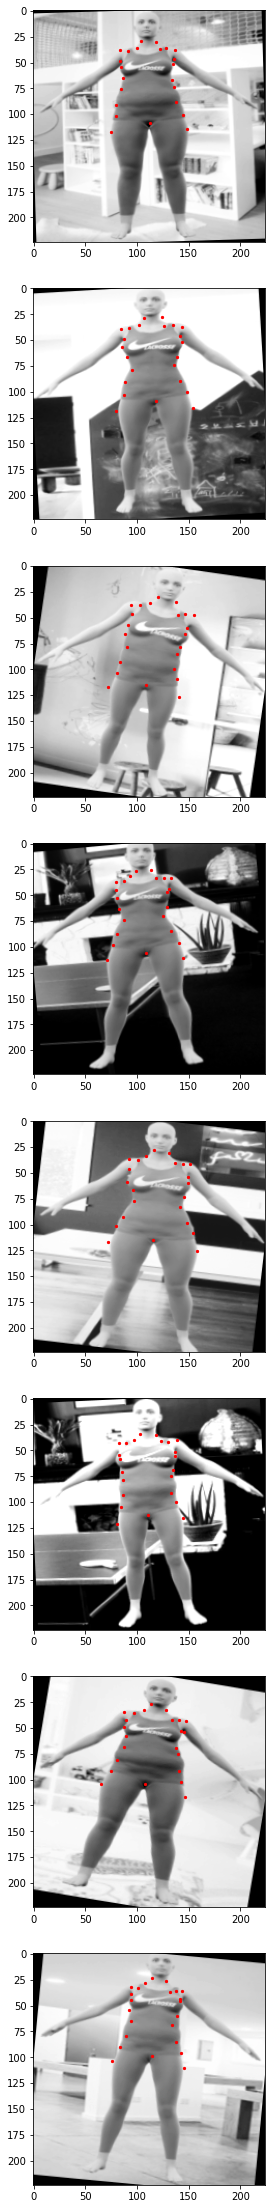

In [ ]:
start_time = time.time()

with torch.no_grad():

    best_network = Network()
    best_network.cuda()
    best_network.load_state_dict(torch.load('body_landmarks.pth')) 
    best_network.eval()
    
    images, landmarks = next(iter(valid_loader))
    
    images = images.cuda()
    landmarks = (landmarks + 0.5) * 224

    predictions = (best_network(images).cpu() + 0.5) * 224
    predictions = predictions.view(-1,23,2)
    
    plt.figure(figsize=(10,40))
    
    for img_num in range(8):
        plt.subplot(8,1,img_num+1)
        plt.imshow(images[img_num].cpu().numpy().transpose(1,2,0).squeeze(), cmap='gray')
        plt.scatter(predictions[img_num,:,0], predictions[img_num,:,1], c = 'r', s = 5)
        #plt.scatter(landmarks[img_num,:,0], landmarks[img_num,:,1], c = 'g', s = 5)

print('Total number of test images: {}'.format(len(valid_dataset)))

end_time = time.time()
print("Elapsed Time : {}".format(end_time - start_time)) 

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


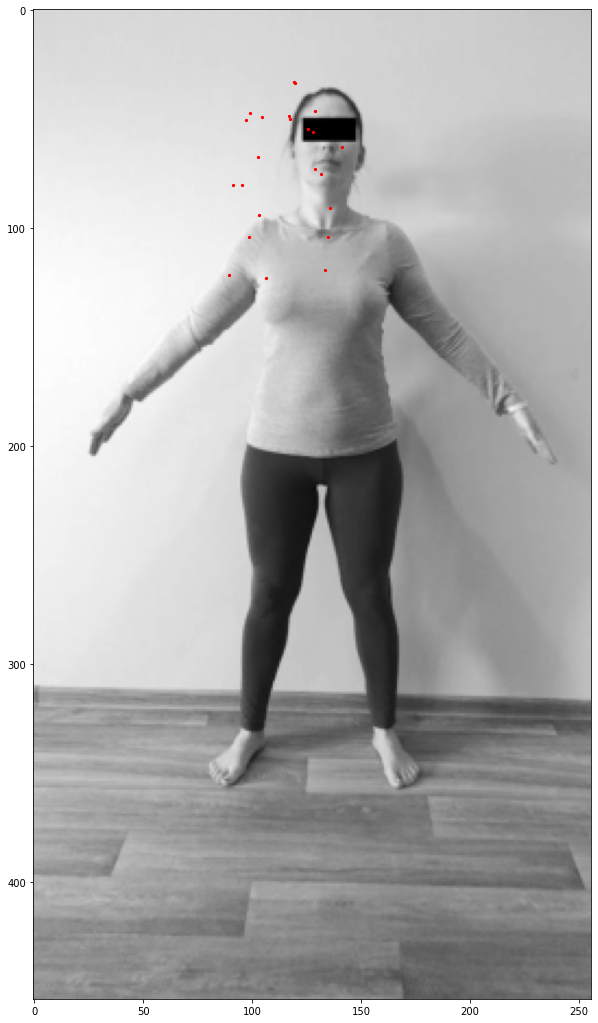

In [ ]:
from torch.autograd import Variable
imsize = 256
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = torchvision.transforms.functional.to_grayscale(image)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    #image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU

image = image_loader("/content/gdrive/MyDrive/Female/M/2/Front.jpg")

predictions = (best_network(image[None, ...]).cpu() + 0.5) * 224
predictions = predictions.view(-1,23,2)
predictions = predictions.detach().numpy()
    
plt.figure(figsize=(10,40))
    
plt.imshow(image.cpu().detach().numpy().transpose(1,2,0).squeeze(), cmap='gray')
plt.scatter(predictions[0,:,0], predictions[0,:,1], c = 'r', s = 5)